<a href="https://colab.research.google.com/github/alishafique3/Uber_and_Lyft_Data_Analysis_and_Price_Prediction/blob/main/Uber_Lyft_Dataset_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In this project, the goal is to develop the inference model to predict the price of Uber and Lyft rides in the Boston MA.
The dataset consists of almost 0.7 million examples with missing values.

1. Problem type: supervised (regression)
2. Target variable: price
3. Features are related to distance, date, location, temperature, climate and sunset.

Machine learning pipeline:
1. Data import, wrangling and visualization.
2. Data preparation and split.
3. Models: Linear, Polynomial, ElasticNet and Neural network regression.
4. Evaluation Metric: mean square error, root mean square error and $R^2$(coefficient of determination) score.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


%matplotlib inline

# Collect/Import the dataset

This dataset is about uber and lyft rides. It contains the information of rides type, price, distance, surge_multiplier, climate, location and sunset.[Link](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)


The kaggle API file is used to download the dataset from kaggle website via command line. [Link](https://www.youtube.com/watch?v=gwDOUuBH7ws&t=345s)

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 74% 33.0M/44.5M [00:01<00:00, 27.6MB/s]
100% 44.5M/44.5M [00:01<00:00, 34.1MB/s]


In [7]:
!unzip /content/uber-and-lyft-dataset-boston-ma.zip

Archive:  /content/uber-and-lyft-dataset-boston-ma.zip
  inflating: rideshare_kaggle.csv    


In [8]:
rides_data = pd.read_csv('/content/rideshare_kaggle.csv')

#2. Explore the Dataset, data wrangling and visualization



This dataset contains 693,071 examples with 57 attributes (56 features and 1 target variable i.e. price). This dataset contains categorical and numerical values.

In [9]:
rides_data.shape

(693071, 57)

In [10]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [11]:
rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [12]:
rides_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

##Get/correct the datetime
pd.to_datetime function is used to calculayte the datetime feature from the timestamp or to correct the data type of the datatime. This features is very useful to

*   Merge the datasets.
*   Visualize/explore the data values to get new insights.
*   Sort the dataset based on date and time.



In [13]:
rides_data['datetime'] = pd.to_datetime(rides_data['datetime'])

In [14]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

## Data Imputation to handle missing values
Missing values are identified in each attribute of the dataset. It can be treated using following techniques


1.   Delete the examples with missing value.
2.   Use mean, median or mode value of the column to fill the missing value.
3.   KNN technique.



In [15]:
rides_data.isnull().sum()/len(rides_data)*100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Price is target variable and it has null values. We can drop those rows

In [16]:
rides_data = rides_data.dropna()

In [17]:
rides_data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [18]:
rides_data.shape

(637976, 57)

## Data Visualization
Figure 1: Lux Black XL, Black SUV prices are higher than other rides type. Uberpool and Shared types have lowest prices.

Figure 2: Rain and clouds are the climate factors for higher surge multiplier.

Figure 3: Long distances should be perfect direct proportion to the price. but we have not observed that relation. It means there are other factors like surge_multiplier who affect the ride price.

Figure 4: People did not prefer to go for long distances when the surge_multiplier is highest.

<Axes: xlabel='surge_multiplier', ylabel='distance'>

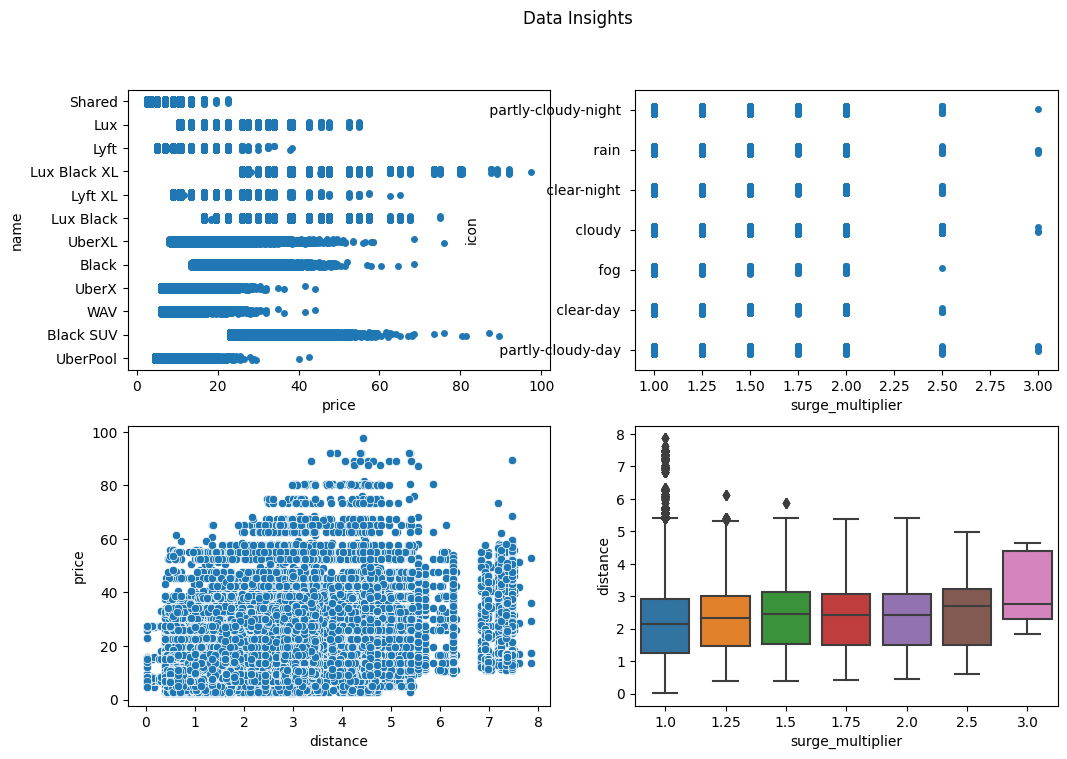

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Data Insights')
sns.stripplot(ax=axes[0, 0], data=rides_data, x='price', y='name')
sns.stripplot(ax=axes[0, 1], data=rides_data, x='surge_multiplier', y='icon')
sns.scatterplot(ax=axes[1, 0], data=rides_data, x='distance', y='price')
sns.boxplot(ax=axes[1, 1], data=rides_data, x='surge_multiplier', y='distance')

Correlation gives pairwise feature relationship. Price attribute relates with distance and surge_multipler in correlation map.

<ipython-input-25-320f71a17de5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=rides_data.corr()[['price']]


<Axes: >

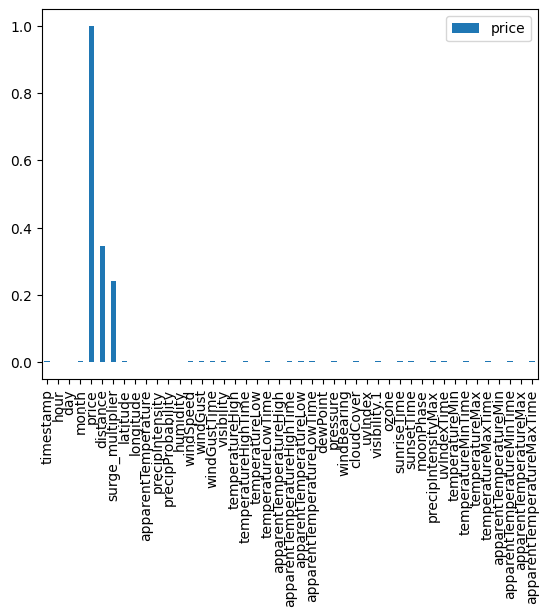

In [25]:
#plotting relation between correlation and rideshare dataframe
correlation=rides_data.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)]
price_corr.plot.bar()

In [ ]:
correlation.style.background_gradient(cmap='coolwarm')

,price
timestamp,0.000808
hour,0.000561
day,-0.000722
month,0.000913
price,1.000000
distance,0.345061
surge_multiplier,0.240458
latitude,0.002088
longitude,-0.001417
temperature,-0.000084


#Data Engineering
By using the domain knowledge, correlation map, visualization and relationship, features can be selected that correspond to target variable.

In [29]:
temp_time_cols = ['temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
 'apparentTemperatureLow', 'apparentTemperatureLowTime',
 'temperatureMin', 'temperatureMinTime', 'temperatureMax','temperatureMaxTime',
 'apparentTemperatureMin','apparentTemperatureMinTime',
 'apparentTemperatureMax','apparentTemperatureMaxTime',
 'uvIndexTime', 'windGustTime', 'sunriseTime','sunsetTime',
 'latitude','longitude'
]
rides_data = rides_data.drop(temp_time_cols, axis=1)


climate_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax']
rides_data = rides_data.drop(climate_col,axis=1)


rides_data = rides_data.drop(['product_id','short_summary', 'icon', 'id',
                              'datetime', 'timezone', 'timestamp',
                              'long_summary', 'visibility.1'],axis=1)

In [30]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hour                 637976 non-null  int64  
 1   day                  637976 non-null  int64  
 2   month                637976 non-null  int64  
 3   source               637976 non-null  object 
 4   destination          637976 non-null  object 
 5   cab_type             637976 non-null  object 
 6   name                 637976 non-null  object 
 7   price                637976 non-null  float64
 8   distance             637976 non-null  float64
 9   surge_multiplier     637976 non-null  float64
 10  temperature          637976 non-null  float64
 11  apparentTemperature  637976 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 63.3+ MB


# Data Preparation and Data Saggregation/Split
Select the numerical columns which can be used for scaling (Normalization) and categorical columns are chosen for one hot encodding.

In [31]:
scale_columns = rides_data.select_dtypes(include=['int64','float64']).columns.tolist()
scale_columns

['hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'temperature',
 'apparentTemperature']

In [32]:
cat_col = rides_data.select_dtypes(include=['object','category']).columns.tolist()
cat_col

['source', 'destination', 'cab_type', 'name']

In [33]:
dummy_features = pd.get_dummies(rides_data[cat_col], drop_first=True)
rides_data = pd.concat([rides_data, dummy_features], axis=1)
rides_data = rides_data.drop(cat_col, axis=1)
rides_data.head()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,source_Beacon Hill,source_Boston University,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,5.0,0.44,1.0,42.34,37.12,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,27,11,11.0,0.44,1.0,43.58,37.35,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,28,11,7.0,0.44,1.0,38.33,32.93,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,34.38,29.63,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,29,11,9.0,0.44,1.0,37.44,30.88,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
rides_data.sort_index()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,source_Beacon Hill,source_Boston University,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,5.0,0.44,1.0,42.34,37.12,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,27,11,11.0,0.44,1.0,43.58,37.35,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,28,11,7.0,0.44,1.0,38.33,32.93,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,34.38,29.63,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,29,11,9.0,0.44,1.0,37.44,30.88,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,9.5,1.00,1.0,37.05,37.05,0,0,...,0,0,0,0,0,0,0,0,0,1
693066,23,1,12,13.0,1.00,1.0,37.05,37.05,0,0,...,0,0,0,0,0,0,0,0,1,0
693067,23,1,12,9.5,1.00,1.0,37.05,37.05,0,0,...,0,0,0,0,0,0,0,1,0,0
693069,23,1,12,27.0,1.00,1.0,37.05,37.05,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split the dataset into train, validation and test dataset

In [35]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
df_train, df_test = train_test_split(rides_data, train_size=0.9, random_state = 100)

In [37]:
print("train data size ->", df_train.shape)
print("test data size ->", df_test.shape)

train data size -> (574178, 42)
test data size -> (63798, 42)


In [38]:
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [39]:
# X_train.head()

In [40]:
# X_train = X_train.sort_index()


In [41]:
# X_train.loc[0]

In [42]:
# X_train.shape

In [43]:
# X_train_np = np.array(X_train.values)
# y_train_np = np.array(y_train.values)

In [44]:
# X_train_np[0]

#Model Pipeline


1.   Model data preprocessing
2.   Model build and compile
3.   Model Training
4.   Model Evaluation and learning curves

##Sklearn Linear Regression with One feature



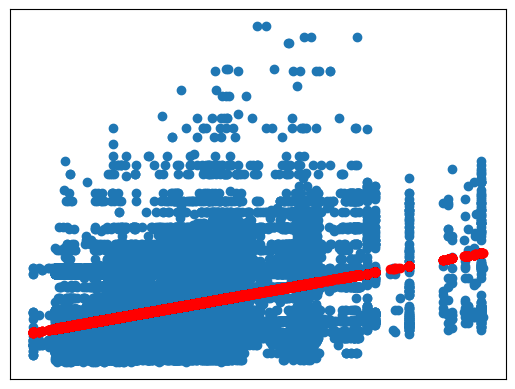

In [45]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
X_train_np = np.array(X_train[['distance']].values)
X_test_np = np.array(X_test[['distance']].values)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_np, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_np)

# Plot outputs
plt.scatter(X_test_np, y_test)
plt.scatter(X_test_np, y_pred, color="red")

plt.xticks(())
plt.yticks(())

plt.show()

##Sklearn Polynomial Regression with One feature


1.   Model data preprocessing
2.   Model build and compile
3.   Model Training
4.   Model Evaluation and learning curves



In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15, include_bias=False)
a = poly.fit_transform(np.array(X_train[['distance']].values))

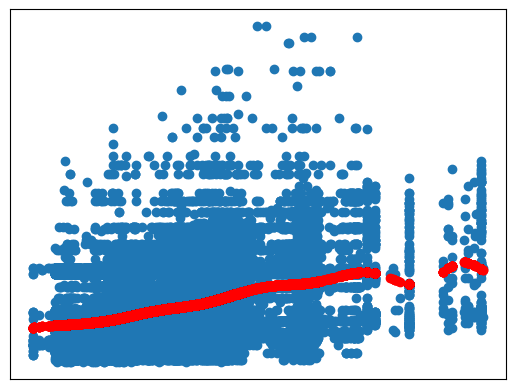

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
X_train_np = poly.fit_transform(np.array(X_train[['distance']].values))
X_test_np = poly.fit_transform(np.array(X_test[['distance']].values))

# Apply linear regression model on polynomial features
polyregr = linear_model.LinearRegression()

# Train the model using the training sets
polyregr.fit(X_train_np, y_train)

# Make predictions using the testing set
y_pred = polyregr.predict(X_test_np)

# Plot outputs
plt.scatter(np.array(X_test[['distance']].values), y_test)
plt.scatter(np.array(X_test[['distance']].values), y_pred, color="red")

plt.xticks(())
plt.yticks(())

plt.show()

##Sklearn Linear Regression with all feature


1.   Model data preprocessing
2.   Model build and compile
3.   Model Training
4.   Model Evaluation and learning curves

R2 value for linear regression model for test dataset:  = 0.9265569174540507
MSE value for linear regression model for test dataset: 6.367494835816448
MSE value for linear regression model for test dataset: 2.5233895529260733


Text(0, 0.5, 'Predicted Points (y_pred)')

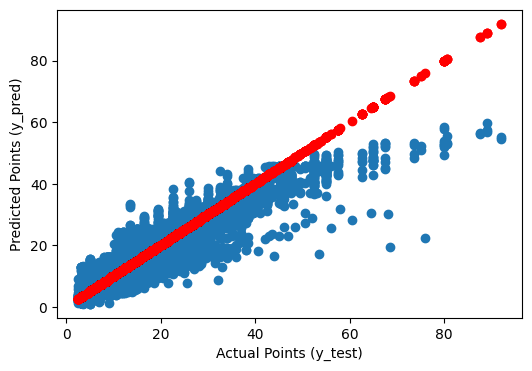

In [48]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use all features
X_train_np = np.array(X_train.values)
X_test_np = np.array(X_test.values)

# Create linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_np, y_train)

# Make predictions using the testing set
y_pred_test = regr.predict(X_test_np)

R2 = r2_score(y_test, y_pred_test)
print("R2 value for linear regression model for test dataset:  =",R2 )

mse_value_linear = mean_squared_error(y_test.values, y_pred_test)
print("MSE value for linear regression model for test dataset:", mse_value_linear)

rmse_value_linear = mse_value_linear**0.5
print("RMSE value for linear regression model for test dataset:", rmse_value_linear)

# Plot outputs
plt.figure(figsize = (6, 4))
plt.scatter(x=y_test, y=y_pred_test)
plt.scatter(x=y_test, y=y_test, color='r')
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})

##Sklearn Polynomial Regression with all feature

distance and surge_multipler attributes are used to develop polynomial features with degree of 15.  

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=15, include_bias=False)
X_train_features = poly.fit_transform(np.array(X_train[['distance','surge_multiplier']].values))
X_test_features = poly.fit_transform(np.array(X_test[['distance','surge_multiplier']].values))


In [50]:
X_train_new = X_train.drop(['distance','surge_multiplier'], axis=1)
X_test_new = X_test.drop(['distance','surge_multiplier'], axis=1)

In [51]:
X_train_rest = np.array(X_train_new.values)
X_test_rest = np.array(X_test_new.values)

In [52]:
X_train_poly = np.concatenate((X_train_features, X_train_rest), axis=1)
X_test_poly =  np.concatenate((X_test_features, X_test_rest), axis=1)

In [53]:
X_train_poly.shape
#X_test_poly.shape

(574178, 174)

R2 value for polynomial model for test dataset:  = 0.9321379029236434
MSE value for polynomial model for test dataset: 5.883624947400958
MSE value for polynomial model for test dataset: 2.425618466989596


Text(0, 0.5, 'Predicted Points (y_pred)')

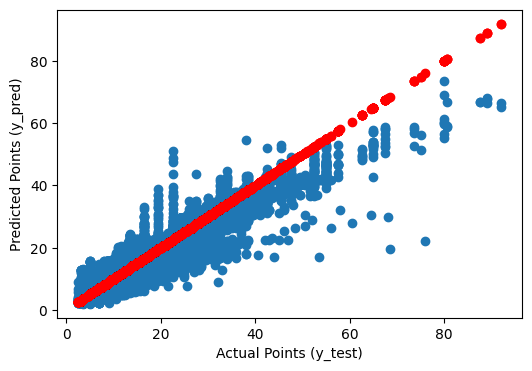

In [55]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use polynomial features
X_train_np = X_train_poly
X_test_np = X_test_poly

# Apply linear regression on polynomial features
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_np, y_train)

# Make predictions using the testing set
y_pred_test = regr.predict(X_test_np)

R2 = r2_score(y_test, y_pred_test)
print("R2 value for polynomial model for test dataset:  =",R2 )

mse_value_poly = mean_squared_error(y_test.values, y_pred_test)
print("MSE value for polynomial model for test dataset:", mse_value_poly)

rmse_value_poly = mse_value_poly**0.5
print("RMSE value for polynomial model for test dataset:", rmse_value_poly)

# Plot outputs
plt.figure(figsize = (6, 4))
plt.scatter(x=y_test, y=y_pred_test)
plt.scatter(x=y_test, y=y_test, color='r')
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})

##Sklearn Elastic Regression with all feature


R2 value for NN model for test dataset:  = 0.9316072824279593
MSE value for NN model for test dataset: 5.929629596837239
RMSE value for NN model for test dataset: 2.435083078015458


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+06, tolerance: 4.994e+03
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Predicted Points (y_pred)')

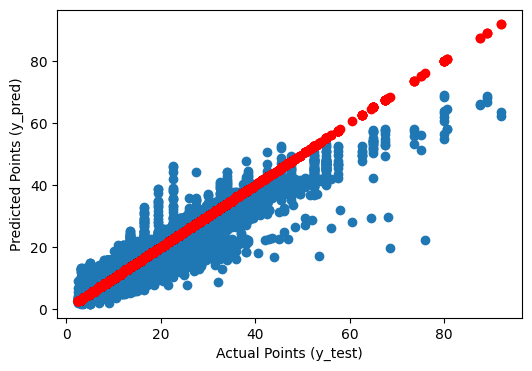

In [56]:

# Use Polynomial features
X_train_np = X_train_poly
X_test_np = X_test_poly


# Create Elastric Regression Model
elasticregr = ElasticNet(alpha = 0.001, random_state=0)

# Train the model using the training sets
elasticregr.fit(X_train_np, y_train)

# Make predictions using the testing set
y_pred_test = elasticregr.predict(X_test_np)

R2 = r2_score(y_test, y_pred_test)
print("R2 value for NN model for test dataset:  =",R2 )

mse_value_elastic = mean_squared_error(y_test.values, y_pred_test)
print("MSE value for NN model for test dataset:", mse_value_elastic)

rmse_value_elastic = mse_value_elastic**0.5
print("RMSE value for NN model for test dataset:", rmse_value_elastic)

# Plot outputs
plt.figure(figsize = (6, 4))
plt.scatter(x=y_test, y=y_pred_test)
plt.scatter(x=y_test, y=y_test, color='r')
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})

##TF Regression with NN + all feature


1.   Model data preprocessing
2.   Model build and compile
3.   Model Training
4.   Model Evaluation and learning curves

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, optimizers
from tensorflow.keras.layers import Dense

tf.random.set_seed(57)

In [58]:
#Neural Network Model with
model=Sequential()
model.add(Dense(12,activation='relu',input_dim= X_train.shape[1]))
model.add(Dense(45,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [59]:
epochs=15
history = model.fit(
    np.array(X_train.values),y_train,
    epochs=epochs,
    validation_split=0.2,
    batch_size=128
)

Epoch 1/15
3589/3589 [==============================] - 15s 4ms/step - loss: 16.1116 - mse: 16.1116 - val_loss: 4.8255 - val_mse: 4.8255
Epoch 2/15
3589/3589 [==============================] - 9s 3ms/step - loss: 4.5458 - mse: 4.5458 - val_loss: 4.5008 - val_mse: 4.5008
Epoch 3/15
3589/3589 [==============================] - 8s 2ms/step - loss: 4.2552 - mse: 4.2552 - val_loss: 4.1561 - val_mse: 4.1561
Epoch 4/15
3589/3589 [==============================] - 9s 2ms/step - loss: 4.0320 - mse: 4.0320 - val_loss: 3.7903 - val_mse: 3.7903
Epoch 5/15
3589/3589 [==============================] - 10s 3ms/step - loss: 3.8655 - mse: 3.8655 - val_loss: 3.6499 - val_mse: 3.6499
Epoch 6/15
3589/3589 [==============================] - 8s 2ms/step - loss: 3.7618 - mse: 3.7618 - val_loss: 3.6167 - val_mse: 3.6167
Epoch 7/15
3589/3589 [==============================] - 9s 3ms/step - loss: 3.6895 - mse: 3.6895 - val_loss: 3.7769 - val_mse: 3.7769
Epoch 8/15
3589/3589 [==============================] - 9s

In [60]:
y_pred_test = model.predict(np.array(X_test.values))
R2 = r2_score(y_test, y_pred_test)
print("R2 value for NN model for test dataset:  =",R2 )

mse_value_NN = mean_squared_error(y_test.values, y_pred_test)
print("MSE value for NN model for test dataset:", mse_value_NN)

rmse_value_NN = mse_value_NN**0.5
print("RMSE value for NN model for test dataset:", rmse_value_NN)

1994/1994 [==============================] - 3s 1ms/step
R2 value for NN model for test dataset:  = 0.9575641759303037
MSE value for NN model for test dataset: 3.679174147522341
RMSE value for NN model for test dataset: 1.918117344565327


Text(0, 0.5, 'Predicted Points (y_pred)')

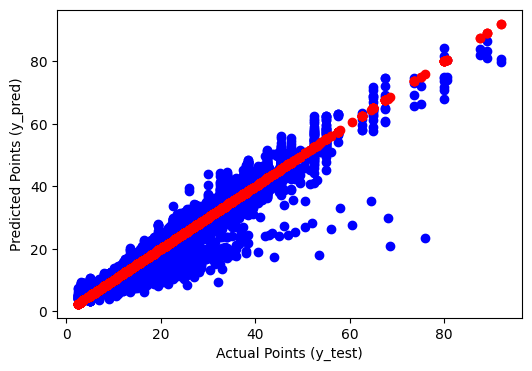

In [61]:
plt.figure(figsize = (6, 4))
plt.scatter(x=y_test, y=y_pred_test, color='b')
plt.scatter(x=y_test, y=y_test, color='r')
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})

#References
1. Kaggle Code: Uber and Lyft Dataset NN - vaibhav007 - [Link](https://www.kaggle.com/code/vaibhavkumbhar/uber-and-lyft-dataset-nn)
2. BM, Uber and Lyft Dataset Boston, MA [Link](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)